# Sieci LSTM

### Sieci LSTM

0. Twórcy: Sepp Hochreiter, Jürgen Schmidhuber
Publikacja: "Long Short-Term Memory", Neural Computation (1997),
DOI: 10.1162/neco.1997.9.8.1735

1. Definicja. LSTM to specjalny rodzaj rekurencyjnej sieci neuronowej (RNN), zaprojektowany do radzenia sobie z problemem zanikającego gradientu i przechowywania długoterminowych zależności.

2. Pamięć długoterminowa. LSTM wprowadza mechanizm "bramek" (gate), które kontrolują przepływ informacji, umożliwiając sieci zapamiętywanie ważnych informacji przez długi czas.

3. Struktura. LSTM składa się z trzech głównych bramek:

- Brama zapominania (forget gate): Decyduje, które informacje należy usunąć z pamięci.

- Brama wejściowa (input gate): Decyduje, które nowe informacje należy zapisać.

- Brama wyjściowa (output gate): Decyduje, które informacje należy przekazać do następnego kroku.

4. "Lepsze niż RNN". LSTM są lepsze od podstawowych RNN, ponieważ potrafią przechowywać i wykorzystywać informacje z dłuższych sekwencji, unikając problemu zanikającego gradientu.

5. Zastosowania. LSTM są szeroko stosowane w zadaniach takich jak tłumaczenie maszynowe, generowanie tekstu, analiza szeregów czasowych i rozpoznawanie mowy.

6. Skalowalność. LSTM mogą być łatwo łączone w głębsze architektury, co zwiększa ich moc modelowania.

7. Regularyzacja. Podobnie jak w RNN, w LSTM stosuje się techniki regularyzacji, takie jak "dropout", aby zapobiec przeuczeniu.

8. Wydajność. LSTM są bardziej złożone obliczeniowo niż podstawowe RNN, ale ich zdolność do modelowania długoterminowych zależności rekompensuje ten koszt.

9. Rozwiązania alternatywne. W niektórych zadaniach LSTM zostały zastąpione przez Transformery, które są jeszcze bardziej wydajne w modelowaniu długich sekwencji.

10. Elastyczność. LSTM mogą być stosowane w różnych konfiguracjach, np. jedno- lub wielokierunkowe, a także w połączeniu z innymi warstwami, takimi jak konwolucyjne.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 31.0858 - val_loss: 6.2156
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 7.0031 - val_loss: 5.5245
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 6.8396 - val_loss: 5.2824
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.6235 - val_loss: 5.1913
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.5412 - val_loss: 5.2163
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.2870 - val_loss: 5.3448
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.9886 - val_loss: 5.4826
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.0743 - val_loss: 5.2082
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.1416 - val_loss: 5.4897
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.0580 - val_loss: 5.0565
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 6.1425 - val_loss: 5.3641
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 6.

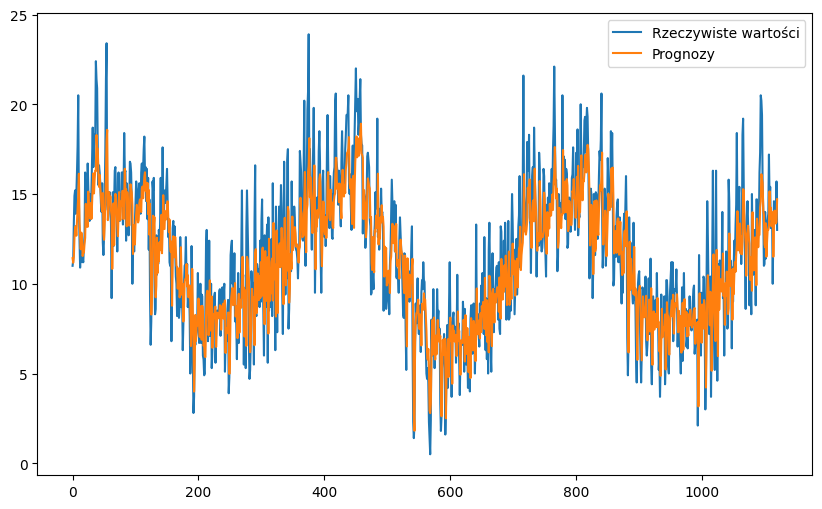

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Pobranie danych
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Przygotowanie danych
series = data['Temp'].values
time = np.arange(len(series))

# Tworzenie sekwencji
def create_sequences(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(series, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape dla LSTM

# Podział na zbiór treningowy i testowy
split_time = 2500
X_train, X_test = X[:split_time], X[split_time:]
y_train, y_test = y[:split_time], y[split_time:]

# Budowa modelu LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Trenowanie modelu
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Prognozowanie
y_pred = model.predict(X_test)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Rzeczywiste wartości')
plt.plot(y_pred, label='Prognozy')
plt.legend()
plt.show()

### Uwagi:

1. Dane. Używamy tych samych danych temperaturowych co w przykładzie z RNN.

2. Sekwencje. Tworzymy sekwencje danych o długości window_size (30 dni) do prognozowania temperatury na następny dzień.

3. Model. Używamy jednej warstwy LSTM z 50 jednostkami i warstwy wyjściowej Dense.

4. Trening. Model jest trenowany przez 20 epok z użyciem optymalizatora Adam i funkcji straty MSE.

5. Wyniki. Wyniki są wizualizowane na wykresie, porównując rzeczywiste wartości z prognozami.

### Dlaczego LSTM są lepsze niż RNN:

1. Radzą sobie z długimi sekwencjami. LSTM potrafią przechowywać informacje przez znacznie dłuższy czas niż podstawowe RNN.

2. Bramki. Mechanizm bramek pozwala LSTM na selektywne zapamiętywanie i zapominanie informacji, co jest kluczowe w modelowaniu złożonych zależności.

3. Mniejszy problem zanikającego gradientu. Dzięki swojej architekturze LSTM lepiej radzą sobie z problemem zanikającego gradientu, co ułatwia uczenie głębokich sieci.

4. Lepsza wydajność w praktyce: LSTM osiągają lepsze wyniki w zadaniach wymagających długoterminowej pamięci, takich jak tłumaczenie maszynowe czy generowanie tekstu.